In [4]:
import numpy as np
import djd.jeti as jeti
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
data = jeti.jetitodict('/Volumes/Public/Dan/dome/uvdome_withluminanceadjustements.csv')
data2uv = jeti.jetitodict('/Volumes/Public/Dan/dome/luminance_uvProjector2/uv_set1.csv')
data2green = jeti.jetitodict('/Volumes/Public/Dan/dome/luminance_uvProjector2/green_set2.csv')

In [160]:
print np.sort(data2green.keys())

['Date' 'Le [W/(sr*sqm)] (380-780nm)' 'Lv [cd/sqm]' 'Name' 'Time'
 'green_10' 'green_100' 'green_20' 'green_30' 'green_40' 'green_50'
 'green_60' 'green_70' 'green_80' 'green_90' 'luminance' 'readings'
 'wavelengths']


0.0026218664985


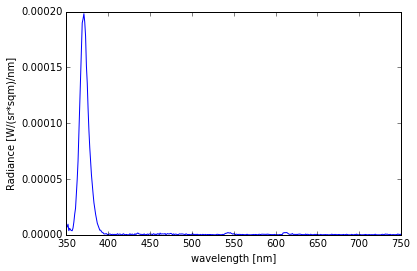

In [5]:
jeti.showSpectra(data,('structuredlight_UV_100',))
plt.ylim(0,0.0002)
plt.xlim(350,750)
print np.trapz(data['structuredlight_UV_100'][0:50])

0.000850380129


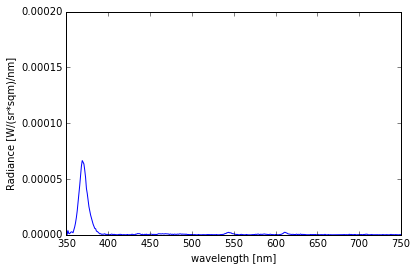

In [6]:
jeti.showSpectra(data,('structuredlight_UV_33',))
plt.ylim(0,0.0002)
plt.xlim(350,750)
print np.trapz(data['structuredlight_UV_33'][0:50])

0.007232639266


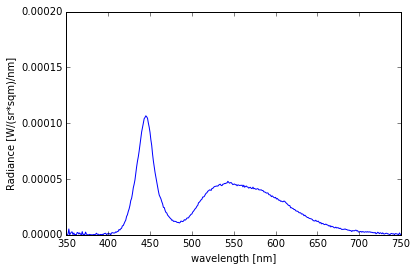

In [7]:
jeti.showSpectra(data,('structuredlight_G_100',))
plt.ylim(0,0.0002)
plt.xlim(350,750)
print np.trapz(data['structuredlight_G_100'][50:250])

0.00339637139175


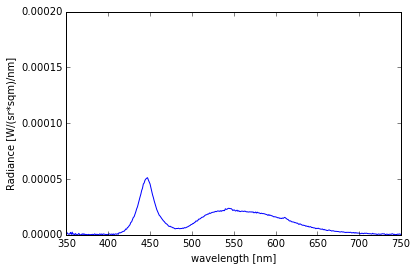

In [8]:
jeti.showSpectra(data,('structuredlight_G_40',))
plt.ylim(0,0.0002)
plt.xlim(350,750)
print np.trapz(data['structuredlight_G_40'][50:250])

In [9]:

print np.trapz(data['video_G_max'][50:250])
print np.trapz(data['video_UV_max'][0:50])
print np.trapz(data['video_G_max'][50:250])/np.trapz(data['video_UV_max'][0:50])
print data['luminance'][0]
print 2.84*0.4

0.004956263013
0.0021568862315
2.29787873863
('video_G_max', '1.846E+00')
1.136


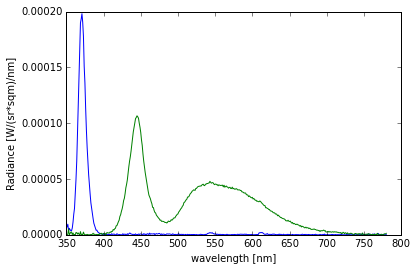

In [10]:
jeti.showSpectra(data,('structuredlight_UV_100','structuredlight_G_100'))

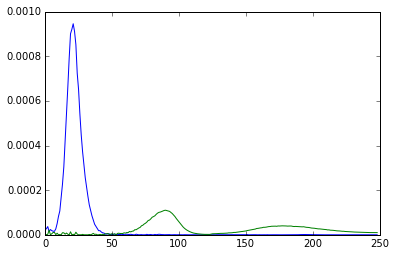

In [18]:
plt.plot(jeti.mso*data['structuredlight_UV_100'][0:249])
plt.plot(jeti.mso*data['structuredlight_G_100'][0:249])


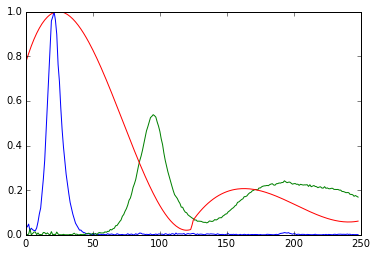

In [30]:
plt.plot(data['structuredlight_UV_100'][0:249]/np.max(data['structuredlight_UV_100'][0:249]))
plt.plot(data['structuredlight_G_100'][0:249]/np.max(data['structuredlight_UV_100'][0:249]))
plt.plot(jeti.mso/np.max(jeti.mso))

0.183358848474


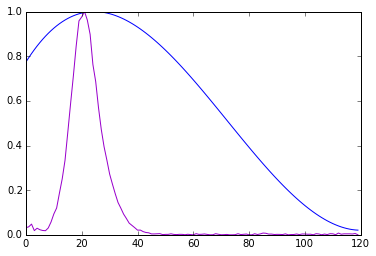

In [45]:
a=jeti.mso/np.max(jeti.mso)
b=data['structuredlight_UV_100'][0:249]/np.max(data['structuredlight_UV_100'][0:249])
print str(np.dot(b[:120],a[:120])/np.trapz(a[:120]))
plt.plot(a[:120])
plt.plot(b[:120],color='#9900cc')

In [36]:
np.trapz(b[:120])

14.693933319839486

0.0460281929535


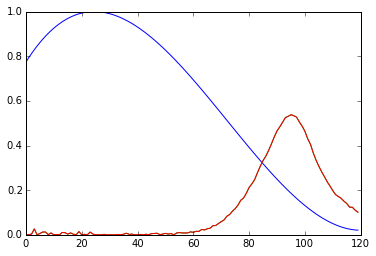

In [46]:
a=jeti.mso/np.max(jeti.mso)
b=data['structuredlight_G_40'][0:249]/np.max(data['structuredlight_UV_100'][0:249])
b=data['structuredlight_G_100'][0:249]/np.max(data['structuredlight_UV_100'][0:249])
print str(np.dot(b[:120],a[:120])/np.trapz(a[:120]))
plt.plot(a[:120])
plt.plot(b[:120])
plt.plot(c[:120])

###adjusting-m cone for lens and self-screening, based on Lyubarsky et al, 1999

In [199]:
scone = np.zeros(431)
mcone = np.zeros(431)
mcone2 = np.zeros(431)

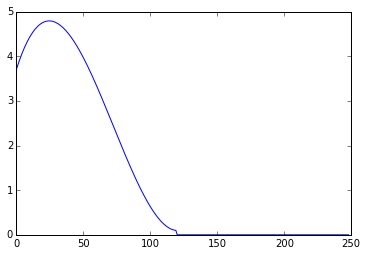

In [200]:
scone[:120]=jeti.mso[:120]
scone = scone[:249]
plt.plot(scone)

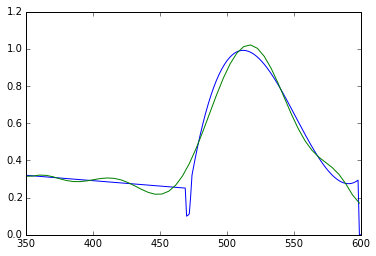

In [219]:
mcone[:120]=[0.32 - 0.07 * i/120. for i in range(120)]
mcone[119:119+128]=jeti.mso[121:]
mcone = mcone[:249]
plt.plot(np.linspace(350,600,249),mcone)
fit = np.polyfit(np.linspace(350,600,249),mcone,10)
p = np.poly1d(fit)
plt.plot(np.linspace(350,350+len(mcone)),p(np.linspace(350,350+len(mcone))))

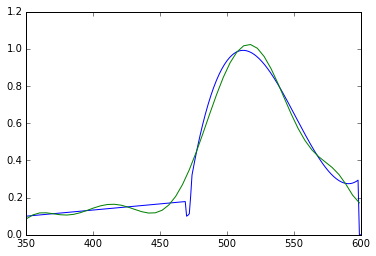

In [220]:
mcone2[:120]=[0.1+0.08 * i/120. for i in range(120)]
mcone2[119:119+128]=jeti.mso[121:]
mcone2 = mcone2[:249]
plt.plot(np.linspace(350,600,249),mcone2)
fit2 = np.polyfit(np.linspace(350,600,249),mcone2,10)
p2 = np.poly1d(fit2)
plt.plot(np.linspace(350,350+len(mcone)),p2(np.linspace(350,350+len(mcone2))))

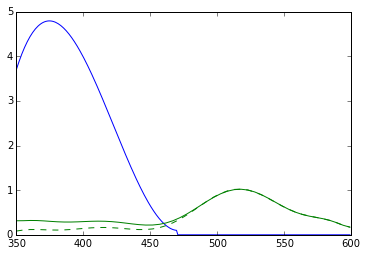

In [223]:
plt.plot(np.linspace(350,350+249,249),scone[:249])
plt.plot(np.linspace(350,350+len(mcone)),p(np.linspace(350,350+len(mcone))))
plt.plot(np.linspace(350,350+len(mcone)),p2(np.linspace(350,350+len(mcone2))),'--',color='g')
plt.gcf().savefig('/Users/administrator/Desktop/cones.eps',fmt='eps')

<br>
<br>
<br>
#projector 1
###baylor-style cone fundamentals from Lyubarsky

m-cone: G-LED / UV-LED:  4.04331170646
s-cone: UV-LED / G-LED:  3.98362040107


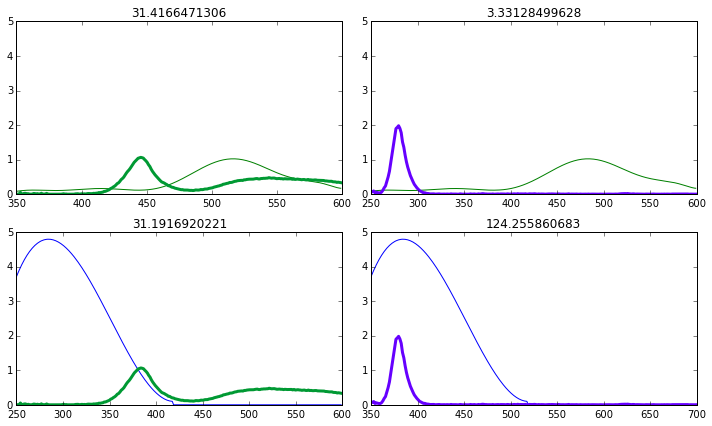

In [212]:
f,ax = plt.subplots(2,2,figsize=(10,6))
a=p(np.linspace(350,350+len(mcone),249))
b=data['structuredlight_G_100'][0:249]*10000
ax[0][0].plot(np.linspace(350,350+249,249),a,color='g')
ax[0][0].plot(np.linspace(350,350+249,249),b,color='#009933',linewidth=3)
ax[0][0].set_title(str(np.dot(b,a)))

a=p(np.linspace(350,350+len(mcone),249))
b=data['structuredlight_UV_100'][0:249]*10000
ax[0][1].set_title(str(np.dot(a,b)))
ax[0][1].plot(np.linspace(250,599,249),a,color='g')
ax[0][1].plot(np.linspace(250,599,249),b,color='#6600ff',linewidth=3)

a=scone[:249] 
b=data['structuredlight_G_100'][0:249]*10000
ax[1][0].set_title(str(np.dot(a,b)))
ax[1][0].plot(np.linspace(250,599,249),a)
ax[1][0].plot(np.linspace(250,599,249),b,color='#009933',linewidth=3)

a=scone[:249] 
b=data['structuredlight_UV_100'][0:249]*10000
ax[1][1].set_title(str(np.dot(a,b)))
ax[1][1].plot(np.linspace(350,699,249),a)
ax[1][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

for axes in ax:
    for axis in axes:
        axis.set_ylim(0,5)
plt.tight_layout()

print 'm-cone: G-LED / UV-LED:  ' + str(34.4107751684/8.51054226501)
print 's-cone: UV-LED / G-LED:  ' + str(124.255860683/31.1916920221)

###with correction for lens and self-screening

m-cone: G-LED / UV-LED:  9.43423423423
s-cone: UV-LED / G-LED:  3.98359280772


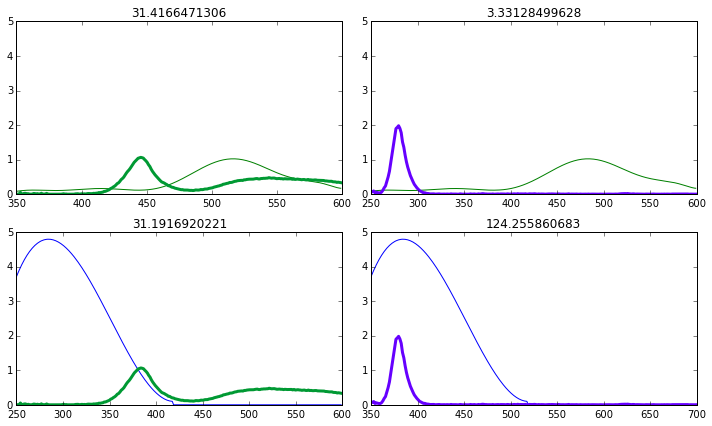

In [211]:
f,ax = plt.subplots(2,2,figsize=(10,6))
a=p(np.linspace(350,350+len(mcone2),249))
b=data['structuredlight_G_100'][0:249]*10000
ax[0][0].plot(np.linspace(350,350+249,249),a,color='g')
ax[0][0].plot(np.linspace(350,350+249,249),b,color='#009933',linewidth=3)
ax[0][0].set_title(str(np.dot(b,a)))

a=p(np.linspace(350,350+len(mcone2),249))
b=data['structuredlight_UV_100'][0:249]*10000
ax[0][1].set_title(str(np.dot(a,b)))
ax[0][1].plot(np.linspace(250,599,249),a,color='g')
ax[0][1].plot(np.linspace(250,599,249),b,color='#6600ff',linewidth=3)

a=scone[:249] 
b=data['structuredlight_G_100'][0:249]*10000
ax[1][0].set_title(str(np.dot(a,b)))
ax[1][0].plot(np.linspace(250,599,249),a)
ax[1][0].plot(np.linspace(250,599,249),b,color='#009933',linewidth=3)

a=scone[:249] 
b=data['structuredlight_UV_100'][0:249]*10000
ax[1][1].set_title(str(np.dot(a,b)))
ax[1][1].plot(np.linspace(350,699,249),a)
ax[1][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

for axes in ax:
    for axis in axes:
        axis.set_ylim(0,5)
plt.tight_layout()

print 'm-cone: G-LED / UV-LED:  ' + str(31.416/3.33)
print 's-cone: UV-LED / G-LED:  ' + str(124.255/31.1916920221)

<br>
<br>
<br>
#projector 2
###baylor-style cone fundamentals

m-cone: G-LED / UV-LED:  1.15704506237
s-cone: UV-LED / G-LED:  145.817677776


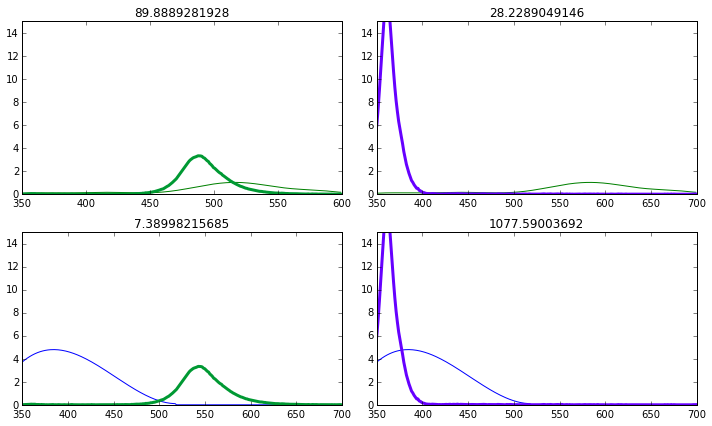

In [210]:
f,ax = plt.subplots(2,2,figsize=(10,6))
a=p(np.linspace(350,350+len(mcone),249))
b=data2green['green_90'][0:249]*10000
ax[0][0].plot(np.linspace(350,350+249,249),a,color='g')
ax[0][0].plot(np.linspace(350,350+249,249),b,color='#009933',linewidth=3)
ax[0][0].set_title(str(np.dot(b,a)))

a=p(np.linspace(350,350+len(mcone),249))
b=data2uv['uv_90'][0:249]*10000
ax[0][1].set_title(str(np.dot(a,b)))
ax[0][1].plot(np.linspace(350,699,249),a,color='g')
ax[0][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

a=scone[:249] 
b=data2green['green_90'][0:249]*10000
ax[1][0].set_title(str(np.dot(a,b)))
ax[1][0].plot(np.linspace(350,699,249),a)
ax[1][0].plot(np.linspace(350,699,249),b,color='#009933',linewidth=3)

a=scone[:249] 
b=data2uv['uv_90'][0:249]*10000
ax[1][1].set_title(str(np.dot(a,b)))
ax[1][1].plot(np.linspace(350,699,249),a)
ax[1][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

for axes in ax:
    for axis in axes:
        axis.set_ylim(0,15)
plt.tight_layout()
print 'm-cone: G-LED / UV-LED:  ' + str(91.3211086311/78.9261469592)
print 's-cone: UV-LED / G-LED:  ' + str(1077.59003692/7.38998215685)

###with correction for lens and self-screening

m-cone: G-LED / UV-LED:  3.18532955351
s-cone: UV-LED / G-LED:  145.817677776


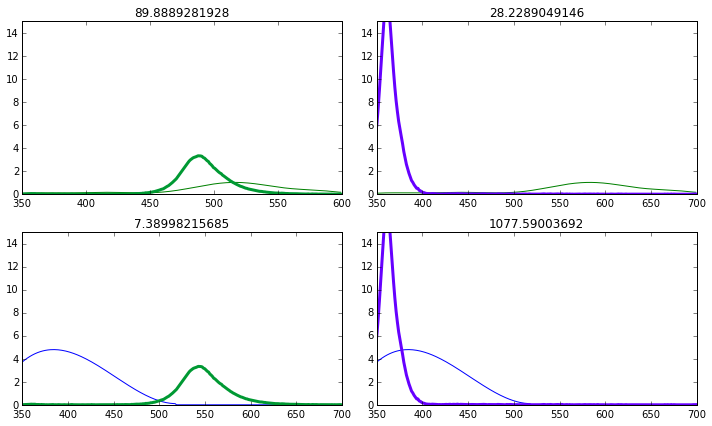

In [213]:
f,ax = plt.subplots(2,2,figsize=(10,6))
a=p(np.linspace(350,350+len(mcone2),249))
b=data2green['green_90'][0:249]*10000
ax[0][0].plot(np.linspace(350,350+249,249),a,color='g')
ax[0][0].plot(np.linspace(350,350+249,249),b,color='#009933',linewidth=3)
ax[0][0].set_title(str(np.dot(b,a)))

a=p(np.linspace(350,350+len(mcone2),249))
b=data2uv['uv_90'][0:249]*10000
ax[0][1].set_title(str(np.dot(a,b)))
ax[0][1].plot(np.linspace(350,699,249),a,color='g')
ax[0][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

a=scone[:249] 
b=data2green['green_90'][0:249]*10000
ax[1][0].set_title(str(np.dot(a,b)))
ax[1][0].plot(np.linspace(350,699,249),a)
ax[1][0].plot(np.linspace(350,699,249),b,color='#009933',linewidth=3)

a=scone[:249] 
b=data2uv['uv_90'][0:249]*10000
ax[1][1].set_title(str(np.dot(a,b)))
ax[1][1].plot(np.linspace(350,699,249),a)
ax[1][1].plot(np.linspace(350,699,249),b,color='#6600ff',linewidth=3)

for axes in ax:
    for axis in axes:
        axis.set_ylim(0,15)
plt.tight_layout()

print 'm-cone: G-LED / UV-LED:  ' + str(89.89/28.22)
print 's-cone: UV-LED / G-LED:  ' + str(1077.59003692/7.38998215685)

In [224]:
0.67/1.33

0.5037593984962406